In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
from DSEHW import Logistic
from DSEHW import Perceptron
from DSEHW import HyperTan

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

In [4]:
logistic = Logistic(learning_rate=0.1, random_state=42, initial_weight=None)
perceptron = Perceptron(learning_rate=0.1, random_state=42, initial_weight=None)
hypertan = HyperTan(learning_rate=0.1, random_state=42, initial_weight=None)

CLASS B
CLASS C


#TWO BLOBS WELL SEPARATED WITH LOGISTIC

In [22]:
#Linearly Separated Blob data with LOGISTIC

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=1/8, random_state=42)

#label_1 = np.where(label_1==0, 0, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

logistic.fit(X_train, y_train)
Y_hat = logistic.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS B
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        85
          1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       165



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


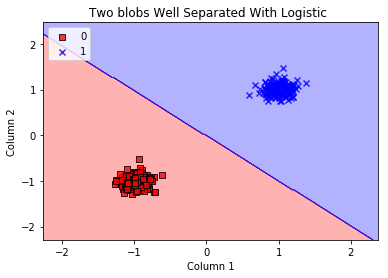

In [6]:
plot_decision_regions(X_train, y_train, classifier=logistic)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Well Separated With Logistic ')
plt.legend(loc='upper left')
plt.show()

CLASS B


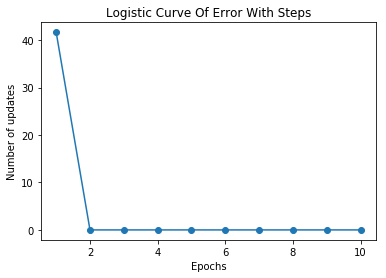

In [9]:
logistic.fit(X_train, y_train)
plt.plot(range(1, len(logistic.cost_) + 1), logistic.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Logistic Curve Of Error With Steps')
plt.show()

##LOGISTIC WITH different learning rates

CLASS B
CLASS B
CLASS B
CLASS B
CLASS B
CLASS B


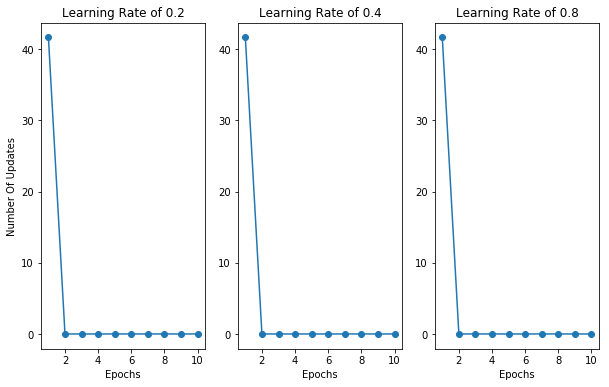

In [15]:

log_learn_1 = Logistic(learning_rate=0.2, random_state=42, initial_weight=None)
log_learn_2 = Logistic(learning_rate=0.4, random_state=42, initial_weight=None)
log_learn_3 = Logistic(learning_rate=0.8, random_state=42, initial_weight=None)

log_learn_1.fit(X_train, y_train)
log_learn_2.fit(X_train, y_train)
log_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(log_learn_1.cost_) + 1), log_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.2')
ax[1].plot(range(1, len(log_learn_2.cost_) + 1), log_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.4')
ax[2].plot(range(1, len(log_learn_3.cost_) + 1), log_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 0.8')



##LOGISTIC WITH different Initial Weight ERROR CURVE

CLASS B
CLASS B


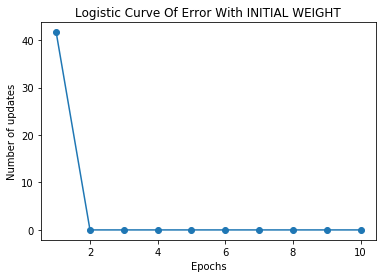

In [26]:
log_initial_weight = Logistic(learning_rate=0.2, random_state=42, initial_weight=None)
log_initial_weight.fit(X_train, y_train)
plt.plot(range(1, len(log_initial_weight.cost_) + 1), log_initial_weight.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Logistic Curve Of Error With INITIAL WEIGHT')
plt.show()

#TWO BLOBS WELL SEPARATED WITH PERCEPTRON

In [18]:
#Linearly Separated Blob data with PERCEPTRON

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=1/8, random_state=42)

label_1 = np.where(label_1==0, -1, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

perceptron.fit(X_train, y_train)
Y_hat = perceptron.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS A
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        85
          1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       165



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


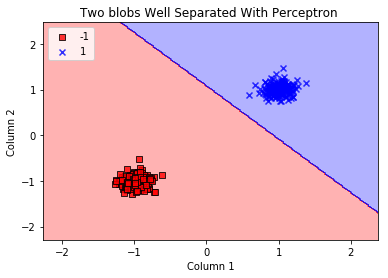

In [19]:
plot_decision_regions(X_train, y_train, classifier=perceptron)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Well Separated With Perceptron ')
plt.legend(loc='upper left')
plt.show()

CLASS A


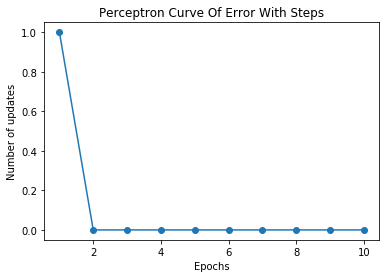

In [20]:
perceptron.fit(X_train, y_train)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Curve Of Error With Steps')
plt.show()

##PERCEPTRON WITH different learning rates

CLASS A
CLASS A
CLASS A


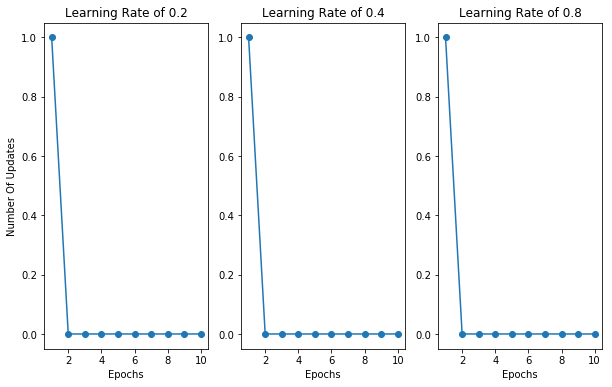

In [21]:
per_learn_1 = Perceptron(learning_rate=0.2, random_state=42, initial_weight=None)
per_learn_2 = Perceptron(learning_rate=0.4, random_state=42, initial_weight=None)
per_learn_3 = Perceptron(learning_rate=0.8, random_state=42, initial_weight=None)

per_learn_1.fit(X_train, y_train)
per_learn_2.fit(X_train, y_train)
per_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(per_learn_1.errors_) + 1), per_learn_1.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.2')
ax[1].plot(range(1, len(per_learn_2.errors_) + 1), per_learn_2.errors_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.4')
ax[2].plot(range(1, len(per_learn_3.errors_) + 1), per_learn_3.errors_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 0.8')

##TWO BLOBS WELL SEPARATED WITH HYPERTAN

In [32]:
#Linearly Separated Blob data with HYPERTAN

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=1/8, random_state=42)

label_1 = np.where(label_1==0, -1, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

hypertan.fit(X_train, y_train)
Y_hat = hypertan.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS C
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        85
          1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       165



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


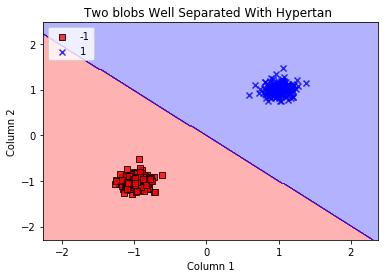

In [28]:
plot_decision_regions(X_train, y_train, classifier=hypertan)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Well Separated With Hypertan ')
plt.legend(loc='upper left')
plt.show()

CLASS C


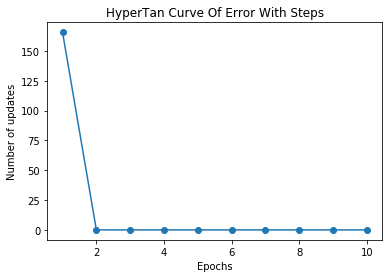

In [30]:
hypertan.fit(X_train, y_train)
plt.plot(range(1, len(hypertan.cost_) + 1), hypertan.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('HyperTan Curve Of Error With Steps')
plt.show()

##HYPERTAN WITH different learning rates

CLASS C
CLASS C
CLASS C
CLASS C
CLASS C
CLASS C


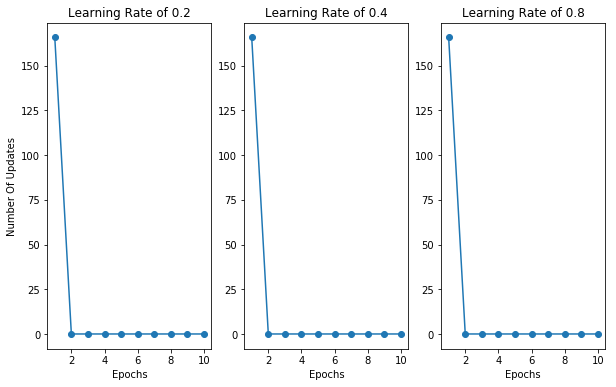

In [34]:
hyp_learn_1 = HyperTan(learning_rate=0.2, random_state=42, initial_weight=None)
hyp_learn_2 = HyperTan(learning_rate=0.4, random_state=42, initial_weight=None)
hyp_learn_3 = HyperTan(learning_rate=0.8, random_state=42, initial_weight=None)

hyp_learn_1.fit(X_train, y_train)
hyp_learn_2.fit(X_train, y_train)
hyp_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(hyp_learn_1.cost_) + 1), hyp_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.2')
ax[1].plot(range(1, len(hyp_learn_2.cost_) + 1), hyp_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.4')
ax[2].plot(range(1, len(hyp_learn_3.cost_) + 1), hyp_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 0.8')

#TWO BLOBS POORLY SEPARATED WITH LOGISTIC

In [35]:
#NonLinearly Separated Blob data with LOGISTIC

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=4, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=5, random_state=42)

label_1 = np.where(label_1==0, 0, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

logistic.fit(X_train, y_train)
Y_hat = logistic.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS B
             precision    recall  f1-score   support

          0       0.46      0.44      0.45        85
          1       0.44      0.46      0.45        80

avg / total       0.45      0.45      0.45       165



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


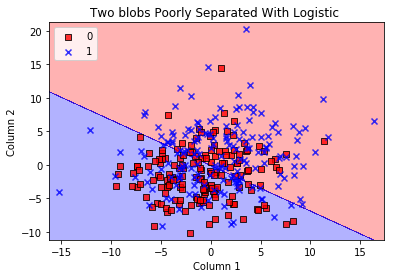

In [36]:
plot_decision_regions(X_train, y_train, classifier=logistic)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Poorly Separated With Logistic ')
plt.legend(loc='upper left')
plt.show()

CLASS B


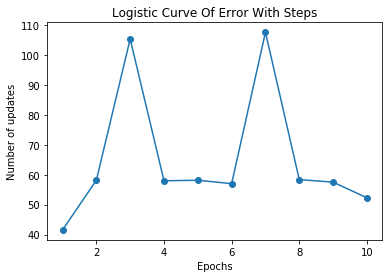

In [37]:
logistic.fit(X_train, y_train)
plt.plot(range(1, len(logistic.cost_) + 1), logistic.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Logistic Curve Of Error With Steps')
plt.show()

##LOGISTIC WITH different learning rates

CLASS B
CLASS B
CLASS B
CLASS B
CLASS B
CLASS B


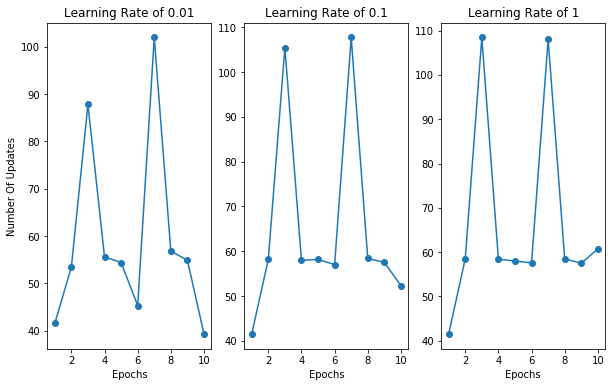

In [44]:
log_learn_1 = Logistic(learning_rate=0.01, random_state=42, initial_weight=None)
log_learn_2 = Logistic(learning_rate=0.1, random_state=42, initial_weight=None)
log_learn_3 = Logistic(learning_rate=1, random_state=42, initial_weight=None)

log_learn_1.fit(X_train, y_train)
log_learn_2.fit(X_train, y_train)
log_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(log_learn_1.cost_) + 1), log_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(log_learn_2.cost_) + 1), log_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(log_learn_3.cost_) + 1), log_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')

#TWO BLOBS POORLY SEPARATED WITH PERCEPTRON

In [45]:
#NonLinearly Separated Blob data with PERCEPTRON

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=4, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=5, random_state=42)

label_1 = np.where(label_1==0, -1, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

perceptron.fit(X_train, y_train)
Y_hat = perceptron.predict(X_test)
print(classification_report(y_test, Y_hat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


CLASS A
             precision    recall  f1-score   support

         -1       0.42      0.35      0.38        85
          1       0.41      0.49      0.45        80

avg / total       0.42      0.42      0.42       165



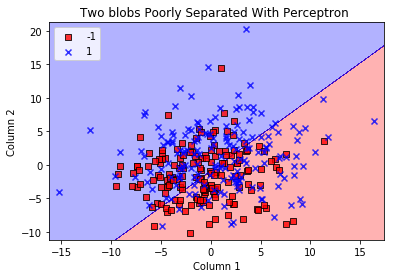

In [46]:
plot_decision_regions(X_train, y_train, classifier=perceptron)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Poorly Separated With Perceptron ')
plt.legend(loc='upper left')
plt.show()

CLASS A


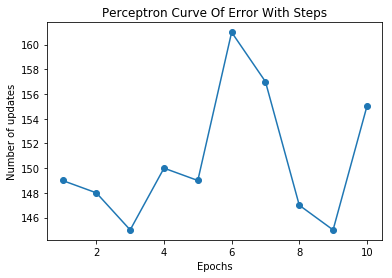

In [47]:
perceptron.fit(X_train, y_train)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Curve Of Error With Steps')
plt.show()

##PERCEPTRON WITH different learning rates

CLASS A
CLASS A
CLASS A


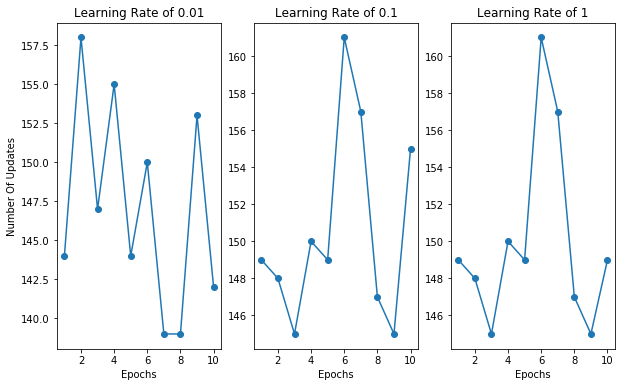

In [48]:
per_learn_1 = Perceptron(learning_rate=0.01, random_state=42, initial_weight=None)
per_learn_2 = Perceptron(learning_rate=0.1, random_state=42, initial_weight=None)
per_learn_3 = Perceptron(learning_rate=1, random_state=42, initial_weight=None)

per_learn_1.fit(X_train, y_train)
per_learn_2.fit(X_train, y_train)
per_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(per_learn_1.errors_) + 1), per_learn_1.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(per_learn_2.errors_) + 1), per_learn_2.errors_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(per_learn_3.errors_) + 1), per_learn_3.errors_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')

#TWO BLOBS POORLY SEPARATED WITH HYPERTAN

In [49]:
#NonLinearly Separated Blob data with HYPERTAN

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=250, centers=[-1,-1],  n_features=2, cluster_std=4, random_state=42) 
data_2, label_2 = make_blobs(n_samples=250, centers=[1,1], n_features=2, cluster_std=5, random_state=42)

label_1 = np.where(label_1==0, -1, 1) 
label_2 = np.where(label_2==0, 1, -1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

hypertan.fit(X_train, y_train)
Y_hat = hypertan.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS C
             precision    recall  f1-score   support

         -1       0.55      0.67      0.61        85
          1       0.55      0.42      0.48        80

avg / total       0.55      0.55      0.54       165



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


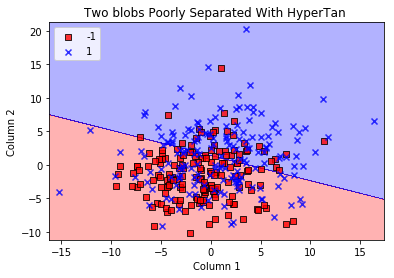

In [50]:
plot_decision_regions(X_train, y_train, classifier=hypertan)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Two blobs Poorly Separated With HyperTan ')
plt.legend(loc='upper left')
plt.show()

CLASS C


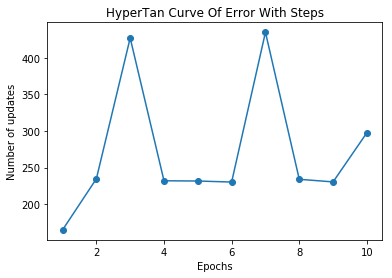

In [51]:
hypertan.fit(X_train, y_train)
plt.plot(range(1, len(hypertan.cost_) + 1), hypertan.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('HyperTan Curve Of Error With Steps')
plt.show()

CLASS C
CLASS C
CLASS C
CLASS C
CLASS C
CLASS C


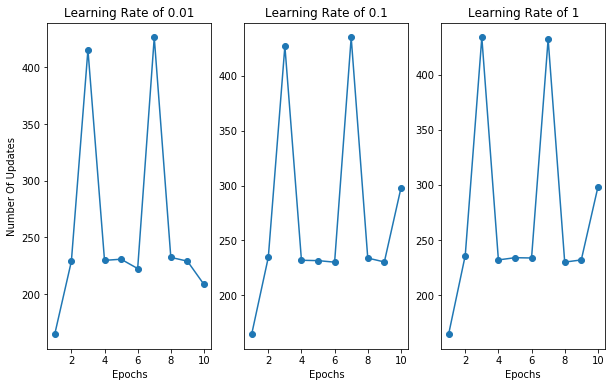

In [52]:
hyp_learn_1 = HyperTan(learning_rate=0.01, random_state=42, initial_weight=None)
hyp_learn_2 = HyperTan(learning_rate=0.1, random_state=42, initial_weight=None)
hyp_learn_3 = HyperTan(learning_rate=1, random_state=42, initial_weight=None)

hyp_learn_1.fit(X_train, y_train)
hyp_learn_2.fit(X_train, y_train)
hyp_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(hyp_learn_1.cost_) + 1), hyp_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(hyp_learn_2.cost_) + 1), hyp_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(hyp_learn_3.cost_) + 1), hyp_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')

#BLOB AND A CICLE WITH LOGISTIC

In [55]:
from sklearn.datasets import make_circles
#CIRCLE data with LOGISTIC

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=5000, centers=[0,0], n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_circles(n_samples=500, random_state=42, factor=0.99) 

label_1[:2500]=1 
label_2 = np.where(label_2==0, 0, 1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

logistic.fit(X_train, y_train)
Y_hat = logistic.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS B
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       868
          1       0.52      1.00      0.69       947

avg / total       0.27      0.52      0.36      1815



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


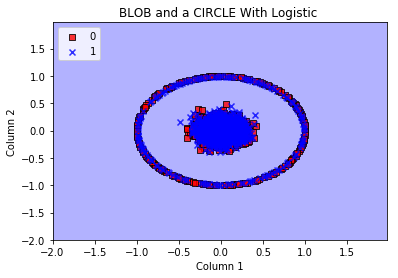

In [56]:
plot_decision_regions(X_train, y_train, classifier=logistic)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('BLOB and a CIRCLE With Logistic ')
plt.legend(loc='upper left')
plt.show()

CLASS B
CLASS B
CLASS B
CLASS B
CLASS B
CLASS B


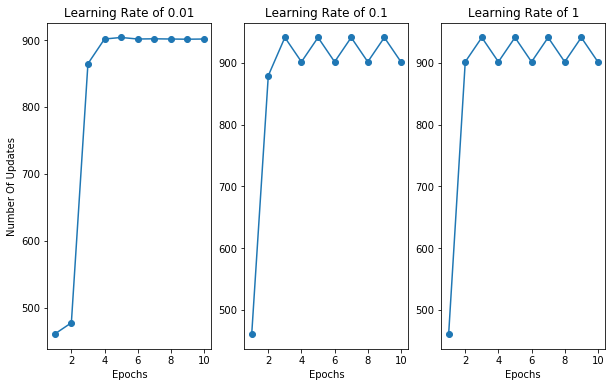

In [57]:
log_learn_1 = Logistic(learning_rate=0.01, random_state=42, initial_weight=None)
log_learn_2 = Logistic(learning_rate=0.1, random_state=42, initial_weight=None)
log_learn_3 = Logistic(learning_rate=1, random_state=42, initial_weight=None)

log_learn_1.fit(X_train, y_train)
log_learn_2.fit(X_train, y_train)
log_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(log_learn_1.cost_) + 1), log_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(log_learn_2.cost_) + 1), log_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(log_learn_3.cost_) + 1), log_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')

#BLOB AND A CICLE WITH PERCEPTRON

In [58]:
#CIRCLE data with PERCEPTRON

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=5000, centers=[0,0], n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_circles(n_samples=500, random_state=42, factor=0.99) 

label_1[:2500]=-1 
label_1[2500:]=1
label_2 = np.where(label_2==0, -1, 1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

perceptron.fit(X_train, y_train)
Y_hat = perceptron.predict(X_test)
print(classification_report(y_test, Y_hat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


CLASS A
             precision    recall  f1-score   support

         -1       0.51      1.00      0.68       930
          1       0.00      0.00      0.00       885

avg / total       0.26      0.51      0.35      1815



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


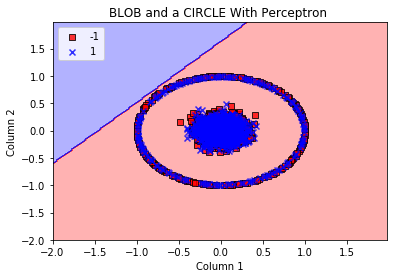

In [59]:
plot_decision_regions(X_train, y_train, classifier=perceptron)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('BLOB and a CIRCLE With Perceptron ')
plt.legend(loc='upper left')
plt.show()

CLASS A
CLASS A
CLASS A


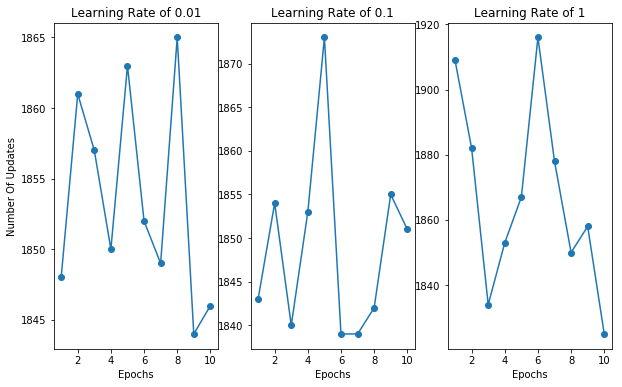

In [60]:
per_learn_1 = Perceptron(learning_rate=0.01, random_state=42, initial_weight=None)
per_learn_2 = Perceptron(learning_rate=0.1, random_state=42, initial_weight=None)
per_learn_3 = Perceptron(learning_rate=1, random_state=42, initial_weight=None)

per_learn_1.fit(X_train, y_train)
per_learn_2.fit(X_train, y_train)
per_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(per_learn_1.errors_) + 1), per_learn_1.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(per_learn_2.errors_) + 1), per_learn_2.errors_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(per_learn_3.errors_) + 1), per_learn_3.errors_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')

#BLOB AND A CICLE WITH HYPERTAN

In [61]:
#CIRCLE data with HYPERTAN

from sklearn.datasets import make_blobs
data_1, label_1 = make_blobs(n_samples=5000, centers=[0,0], n_features=2, cluster_std=1/8, random_state=42) 
data_2, label_2 = make_circles(n_samples=500, random_state=42, factor=0.99) 

label_1[:2500]=-1 
label_1[2500:]=1
label_2 = np.where(label_2==0, -1, 1) 
separated_blob_data = np.vstack([data_1, data_2])
separated_blob_label = np.hstack([label_1, label_2])

X_train, X_test, y_train, y_test = train_test_split(
            separated_blob_data, separated_blob_label, test_size=0.33, random_state=42)

hypertan.fit(X_train, y_train)
Y_hat = hypertan.predict(X_test)
print(classification_report(y_test, Y_hat))

CLASS C
             precision    recall  f1-score   support

         -1       0.51      1.00      0.68       930
          1       0.00      0.00      0.00       885

avg / total       0.26      0.51      0.35      1815



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


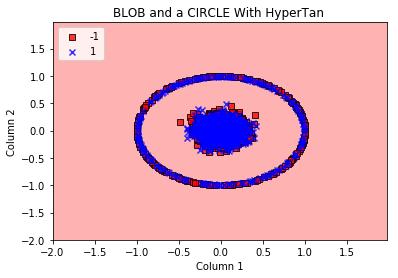

In [62]:
plot_decision_regions(X_train, y_train, classifier=hypertan)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('BLOB and a CIRCLE With HyperTan ')
plt.legend(loc='upper left')
plt.show()

CLASS C
CLASS C
CLASS C
CLASS C
CLASS C
CLASS C


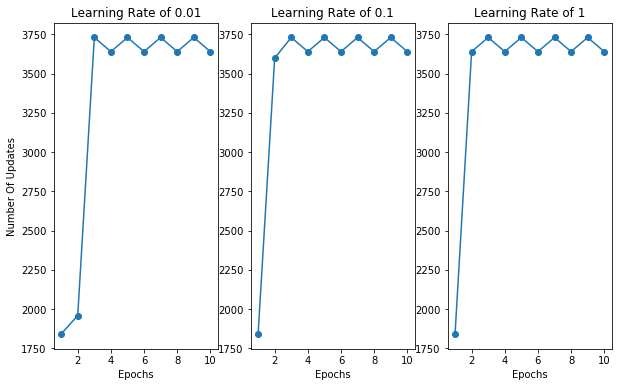

In [63]:
hyp_learn_1 = HyperTan(learning_rate=0.01, random_state=42, initial_weight=None)
hyp_learn_2 = HyperTan(learning_rate=0.1, random_state=42, initial_weight=None)
hyp_learn_3 = HyperTan(learning_rate=1, random_state=42, initial_weight=None)

hyp_learn_1.fit(X_train, y_train)
hyp_learn_2.fit(X_train, y_train)
hyp_learn_3.fit(X_train, y_train)

fig, ax= plt.subplots(1, 3, figsize=(10,6))
ax[0].plot(range(1, len(hyp_learn_1.cost_) + 1), hyp_learn_1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number Of Updates')
ax[0].set_title('Learning Rate of 0.01')
ax[1].plot(range(1, len(hyp_learn_2.cost_) + 1), hyp_learn_2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Number Of Updates')
ax[1].set_title('Learning Rate of 0.1')
ax[2].plot(range(1, len(hyp_learn_3.cost_) + 1), hyp_learn_3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Number Of Updates')
ax[2].set_title('Learning Rate of 1')